In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [2]:
data=pd.read_csv("C:\\Users\\mahen\\Downloads\\diamonds.csv")

In [3]:
data.head() # here price the target varaible ,

# This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price. Feature description: price price in US dollars ($326--$18,823)This is the target column containing tags for the features. The 4 Cs of Diamonds:- carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.LOADING DATA Loading Data This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price. Feature description: price price in US dollars ($326--$18,823)This is the target column containing tags for the features. The 4 Cs of Diamonds:- carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye. color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds. clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

# Dimensions

# x length in mm (0--10.74)

# y width in mm (0--58.9)

# z depth in mm (0--31.8)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### The first column is an index ("Unnamed: 0") and thus we are going to remove it.


In [6]:
# the first column seems to be just index
data=data.drop(['Unnamed: 0'],axis=1) # here we specifed the column name and we use drop function and we tell axis=1 it means it checks the columns names whoes name is unnamed:0
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
data.describe() # describe is used to find the descripitive statistics of the data 

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Points to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [8]:
data=data.drop(data[data['x']==0].index) # here by using drop fucntion and index method we are trying to drop the rows which contain 0's in x,y,z columns and we are specifically dropping the only rows which contain x,y,z zeroes as values by suing index method
data=data.drop(data[data['y']==0].index)
data=data.drop(data[data['z']==0].index)
data.shape # here we can observed that 20 rows got dropped and we have 10 columns

(53920, 10)

We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

## pairplot of the data

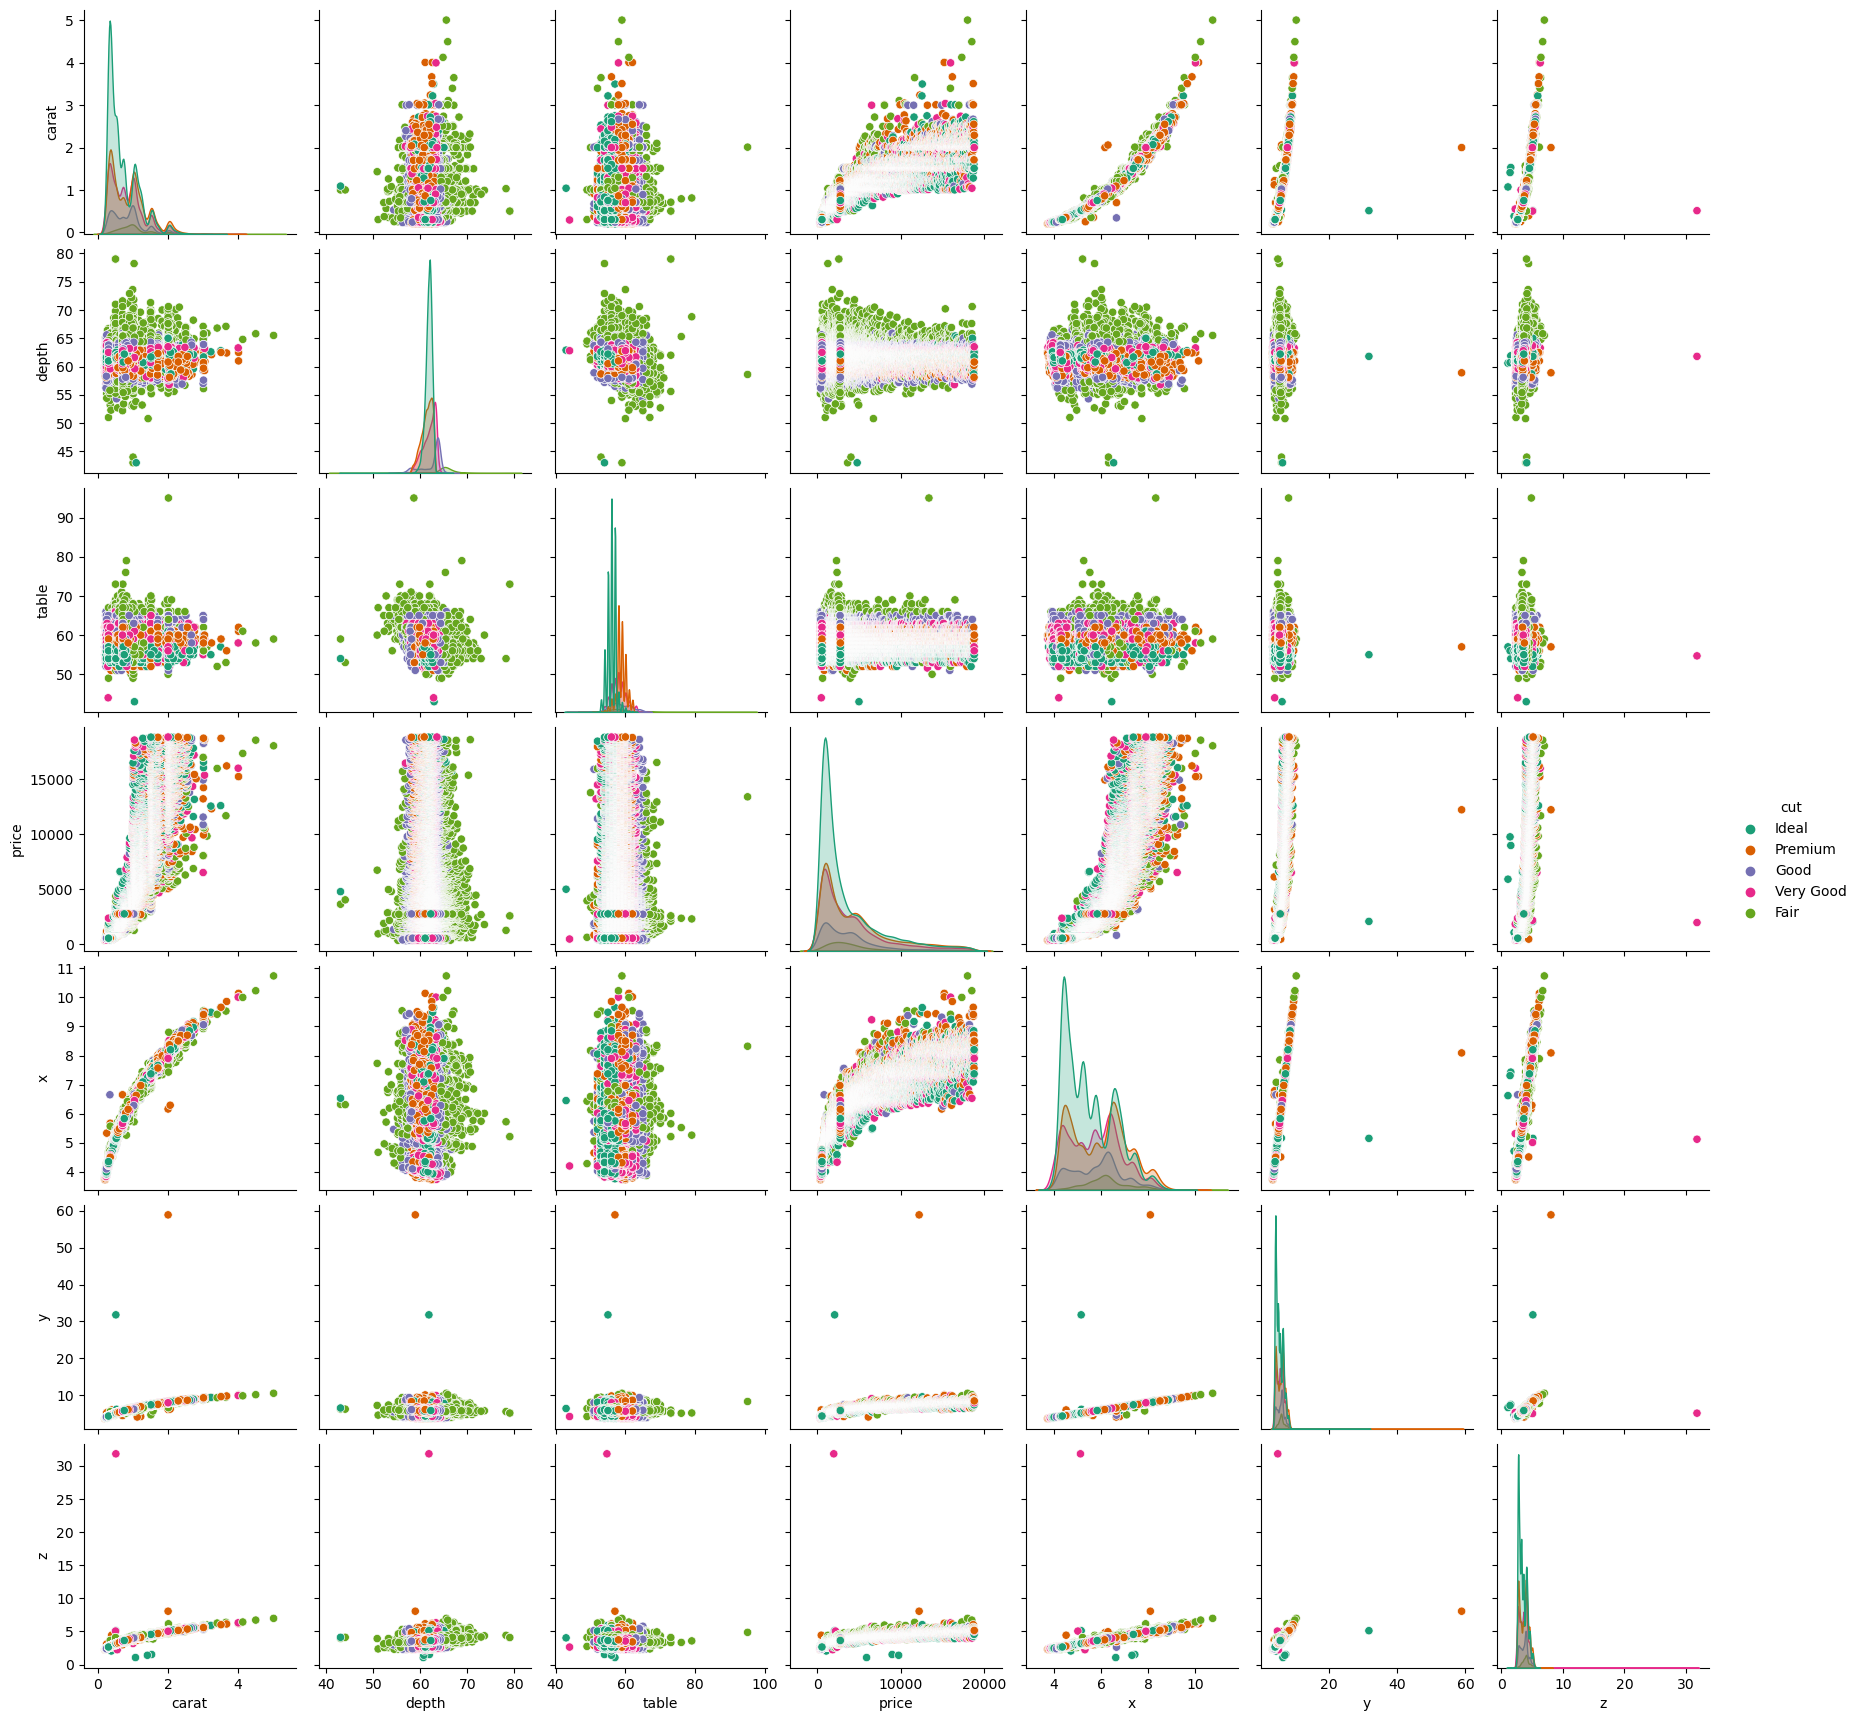

In [9]:
shape='Dark2'
sns.pairplot(data,hue='cut',palette=shape) # here we got the pairplot by this we can get to know how every features are corelated to each other,In data analysis and visualization, a pair plot is a type of plot that shows the pairwise relationships between different variables in a dataset. It is also known as a scatterplot matrix, or a pairs plot. A pair plot is particularly useful when you want to explore the relationships between multiple variables in a dataset. By plotting all possible combinations of variables in a grid of scatter plots, you can quickly identify patterns and relationships between variables, such as correlations, clusters, or outliers.

A few points to notice in these pair plots

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

1. "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
2. The "depth" should be capped but we must examine the regression line to be sure.
3. The "table" featured should be capped too.
4. Let's have a look at regression plots to get a close look at the outliers.



# How the outliers effect our model output

Outliers are observations in a dataset that are significantly different from the other observations, either in terms of their values or their distribution. Outliers can have a significant impact on the model output or statistical analysis, and it is important to understand their effects in order to properly interpret the results.

The effects of outliers on a model output depend on the type of model and the analysis being performed. Here are some general ways in which outliers can affect model output:

1. Outliers can affect the estimates of statistical parameters, such as the mean or standard deviation. This can lead to biased estimates and inaccurate results.

2. Outliers can have a disproportionate impact on regression models, which are used to model the relationship between two or more variables. Outliers can affect the slope and intercept of the regression line, and can also affect the significance and accuracy of the model.

3. Outliers can affect the results of clustering algorithms, which are used to group similar data points together. Outliers can create clusters that are not representative of the overall data distribution, or can cause the algorithm to fail to identify clusters altogether.

4. Outliers can affect the results of machine learning models, which are used to make predictions based on historical data. Outliers can affect the accuracy and reliability of the model, and can cause the model to overfit to the outliers rather than the underlying data distribution.

In general, outliers can have a significant impact on model output, and it is important to identify and handle them appropriately. This may involve removing the outliers from the dataset, transforming the data to reduce the impact of outliers, or using robust statistical methods that are less sensitive to outliers.

## Here we are trying to see the outliers if do present between target feature which is price vs 'x', 'y', 'z', depth, table features

Text(0.5, 1.0, 'Regression line on price vs x')

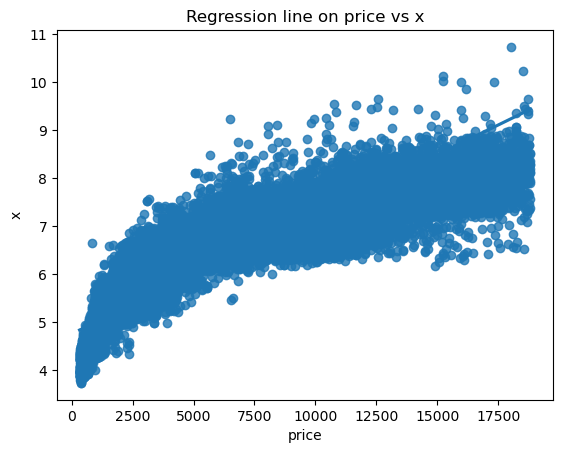

In [10]:
# regression plots =  regression plot shows the relationship between two variables, along with any outliers in the data. In Python, the regression plot is a statistical visualization technique used to display the relationship between two variables by fitting a linear regression model to the data. It is commonly implemented using the Seaborn library, which is built on top of the matplotlib library.  The regression plot shows the scatter plot of the data points along with a line of best fit that represents the linear relationship between the variables. The slope of the line indicates the strength and direction of the relationship
sns.regplot(x='price',y='x',data=data)
plt.title('Regression line on price vs x')

Text(0.5, 1.0, 'Regression line on price vs y')

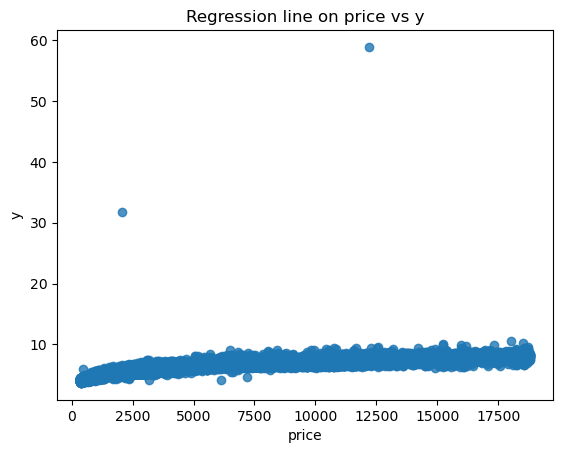

In [11]:
sns.regplot(x='price',y='y',data=data)
plt.title('Regression line on price vs y')

Text(0.5, 1.0, 'Regression line on price vs z')

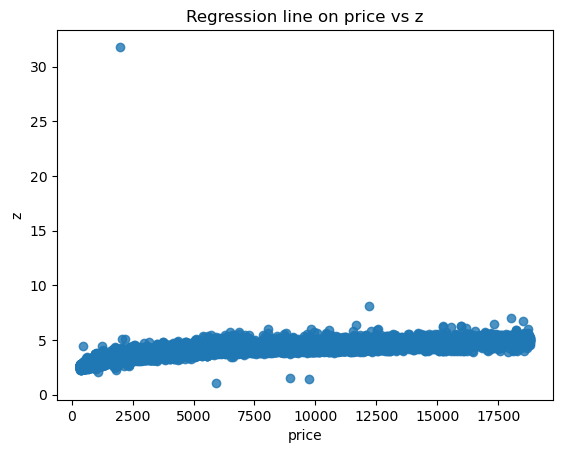

In [12]:
sns.regplot(x='price',y='z',data=data)
plt.title('Regression line on price vs z')

Text(0.5, 1.0, 'Regression line on price vs depth')

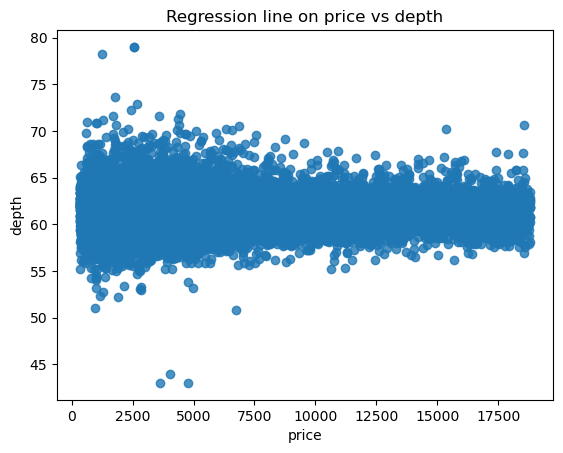

In [13]:
sns.regplot(x='price',y='depth',data=data) 
plt.title('Regression line on price vs depth')

Text(0.5, 1.0, 'Regression line on price vs Table')

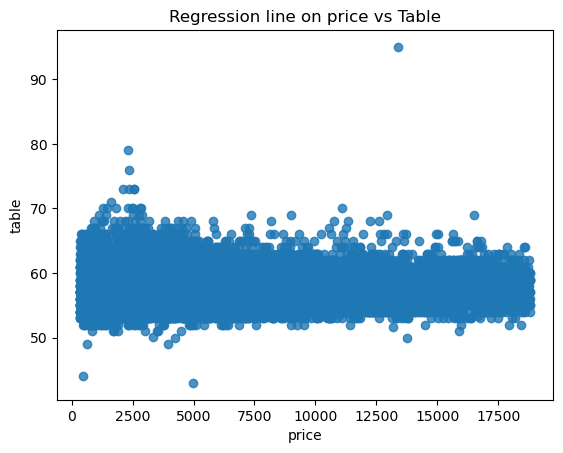

In [14]:
sns.regplot(x='price',y='table',data=data)
plt.title('Regression line on price vs Table')

We can clearly spot outliers in these attributes. Next up, we will remove these data points which are outliers

In [15]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)] # The code you provided filters the "data" dataframe based on two conditions: the value in the "depth" column should be less than 75 and greater than 45. Only rows that satisfy both conditions will be selected and kept in the "data" dataframe.
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

We can clearly spot outliers in these attributes. Next up, we will remove these data points.Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

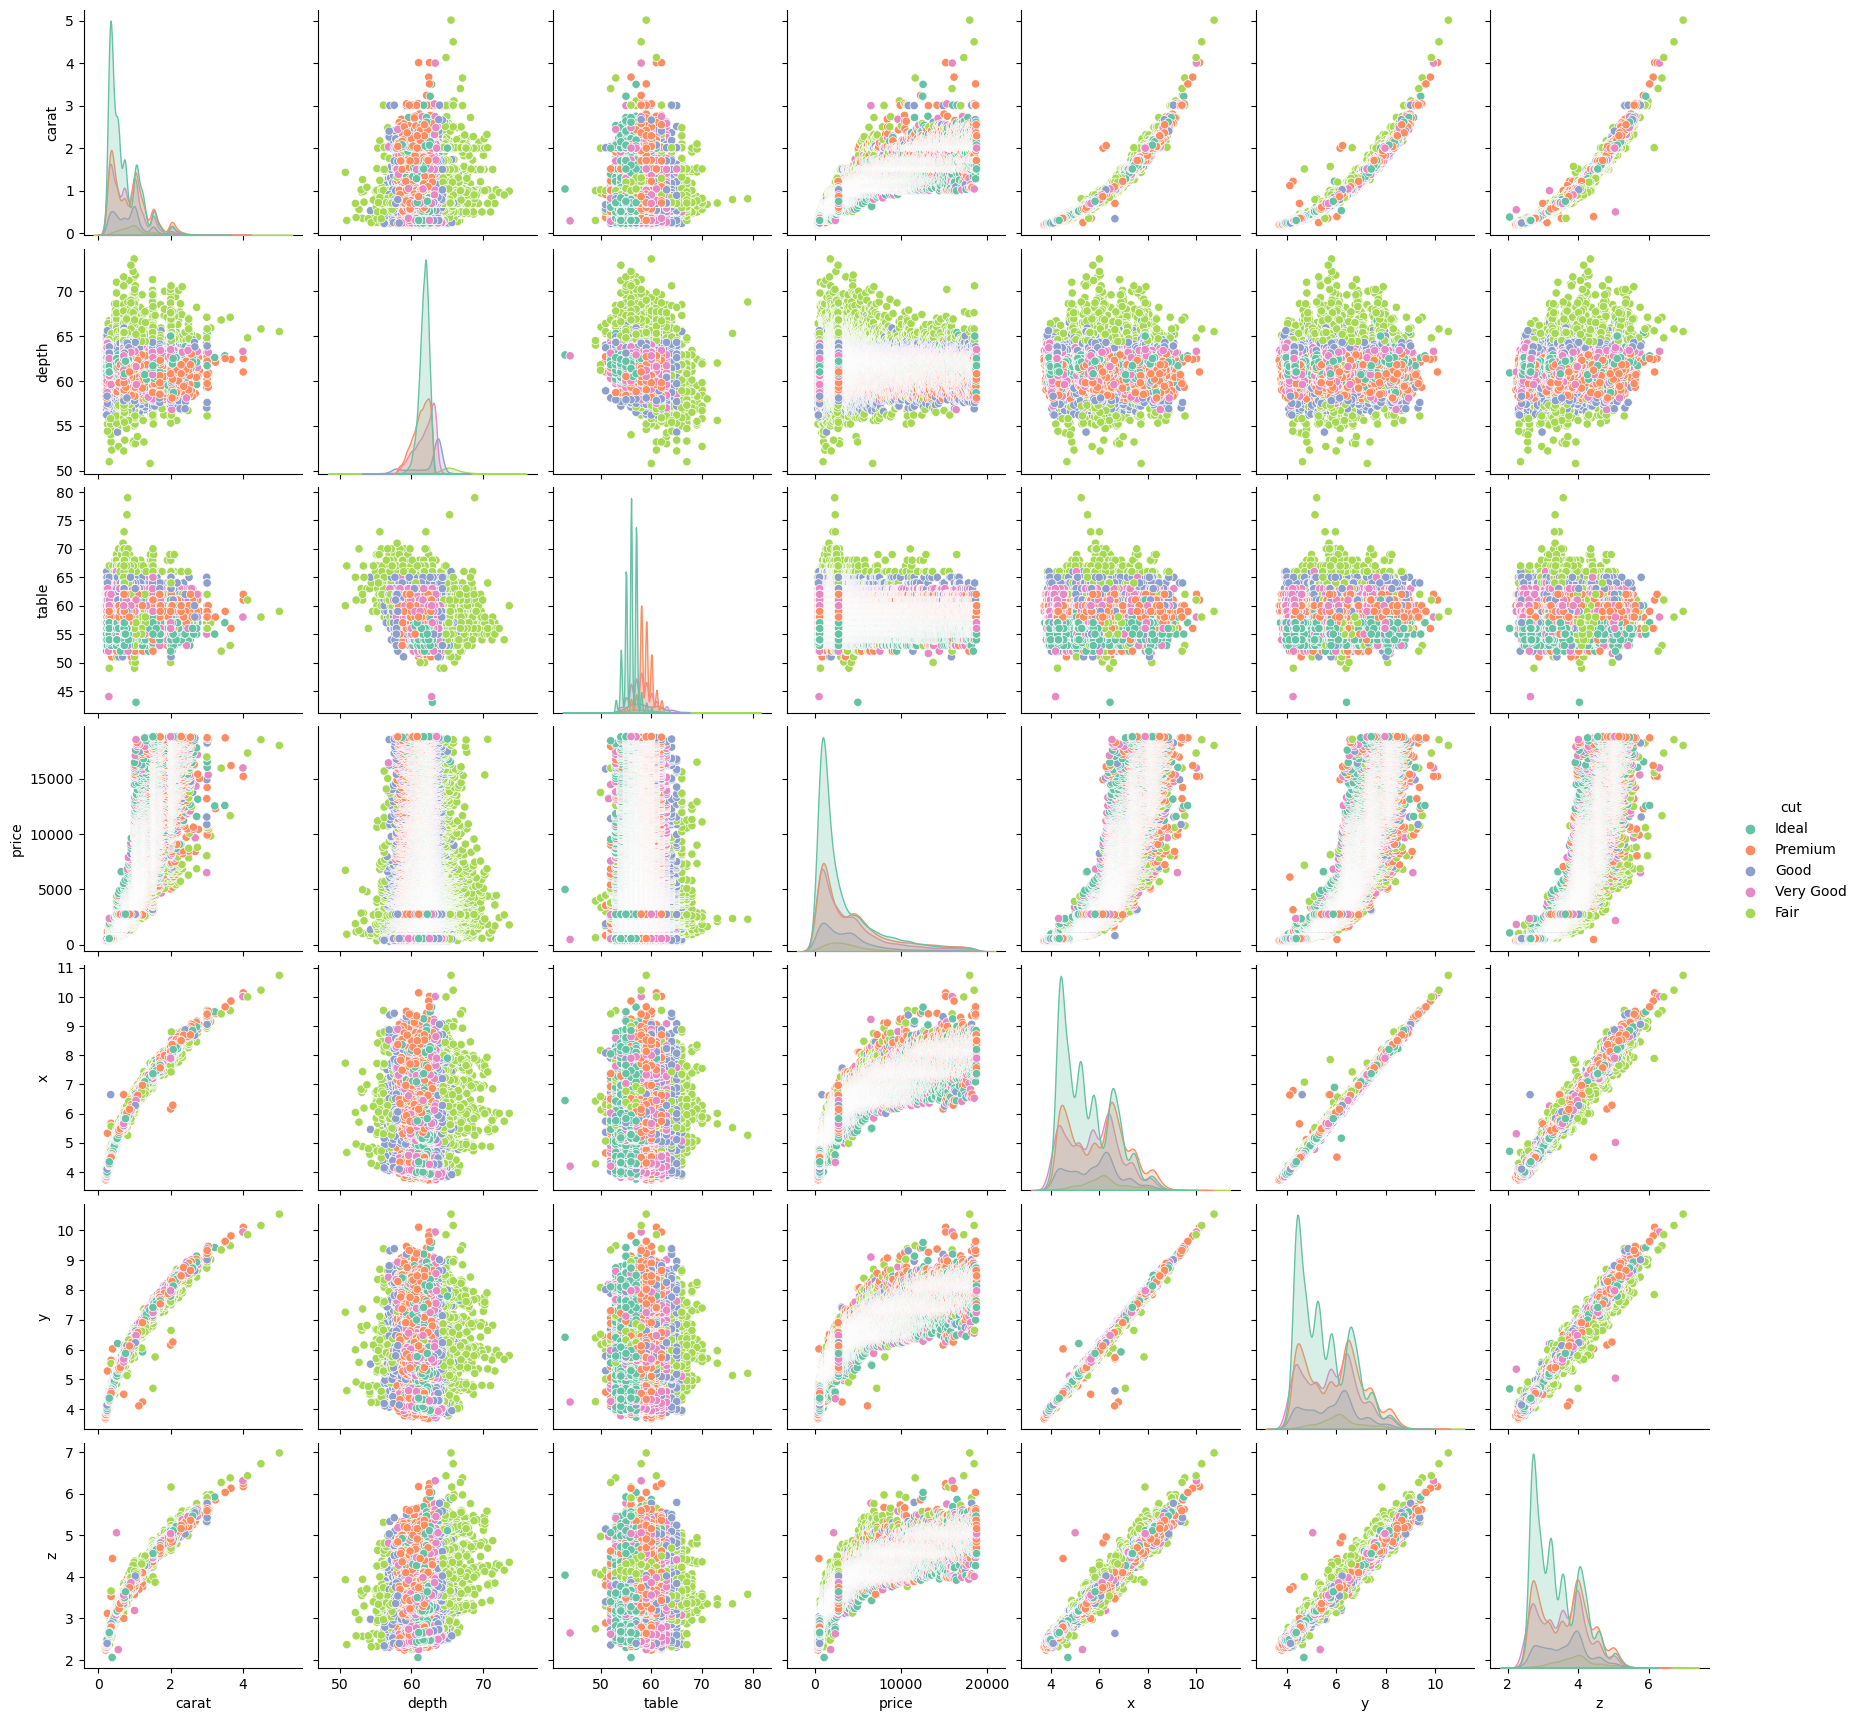

In [16]:
shade='Set2' # "Set2" is the name of a color palette available in the Seaborn library. A color palette is a collection of colors that can be used to colorize the different elements in a plot. In Seaborn, color palettes are defined as lists of RGB tuples or as named color palettes. "Set2" is a named color palette that consists of 8 colors. It is a qualitative color palette, which means that the colors are distinct and do not convey any order or magnitude. It is often used for coloring categorical variables with a small number of levels (e.g., 3 to 8 levels). You can use other named color palettes in Seaborn, such as "Set1", "Dark2", "Pastel1", "Paired", and "Accent", or you can define your own custom color palette using RGB tuples or hexadecimal codes. The choice of color palette depends on the type of data and the message you want to convey in your plot.
ax=sns.pairplot(data, hue= "cut",palette=shade) # here hue=cut mean the data variable contains a dataframe with several columns, including a column named "cut" which represents different categories or groups. When you set hue="cut", seaborn will use the unique values in the "cut" column to assign different colors to the data points based on their corresponding category.
ax # as we know that cut is a categorical variable and here we are trying assign different color to thoes different unique values which are Fair, Good, Very Good, Premium, Ideal in the cut column 

That's a much cleaner dataset. Next, we will deal with the categorical variables

In [17]:
# getting /selecting a list of categorical variables
s=data.dtypes=='object' # The expression data.dtypes == 'object' returns a boolean Series where the index is the column names of the data DataFrame and the values are True for columns that have an object data type (i.e., string or categorical variables) and False for columns that have a numeric data type.
print(s)
object_cols=list(s[s].index) # The next line of code, s[s], uses boolean indexing to select only the columns where the value is True. This returns a Series that has the same index as s, but only includes the columns where the data type is object. Finally, the list function is used to convert the index of the resulting Series to a list of strings, which gives the column names of the data DataFrame that have an object data type.

carat      False
cut         True
color       True
clarity     True
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool


In [18]:
print("categorical varaibles=",object_cols)

categorical varaibles= ['cut', 'color', 'clarity']


## Now we are comparing the categorical features with target feature which is price

Text(0.5, 1.0, 'violineplot for cut vs price')

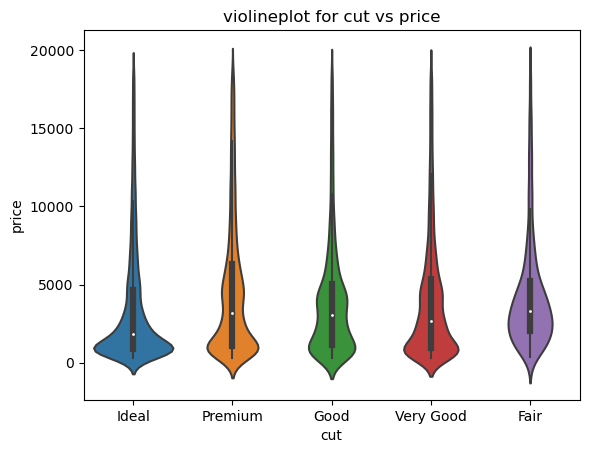

In [19]:
# creating a violine plot = A violin plot is a statistical visualization tool used to display the distribution of a numeric variable for different categories or groups. It is similar to a box plot but provides more information about the shape and density of the distribution. In a violin plot, each group or category is represented by a "violin" shape, which shows the distribution of the data as a combination of a kernel density plot and a box plot. The width of the violin at any given point represents the density of the data at that point, with wider parts indicating a higher density of data. The box plot inside the violin indicates the median, quartiles, and range of the data for each group. Violin plots are useful for comparing the distribution of a variable across multiple groups or categories and for identifying differences or similarities between the groups. They can also reveal the presence of multiple modes or outliers in the distribution, which may not be apparent from a simple histogram or box plot.
sns.violinplot(x='cut',y='price',data=data)
plt.title("violineplot for cut vs price")

Text(0.5, 1.0, 'violineplot for color vs price')

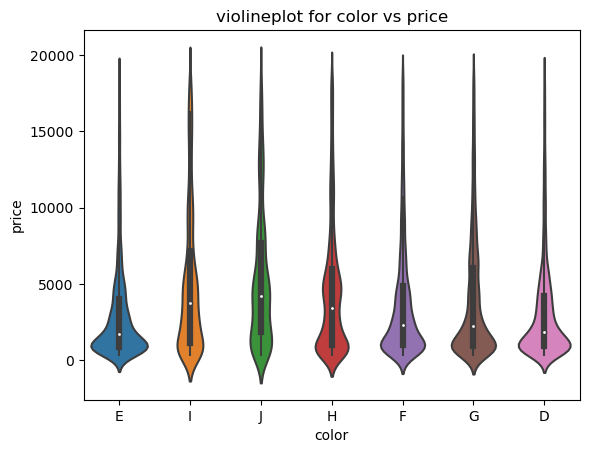

In [20]:
sns.violinplot(x='color',y='price',data=data)
plt.title("violineplot for color vs price")

Text(0.5, 1.0, 'violineplot for clarity vs price')

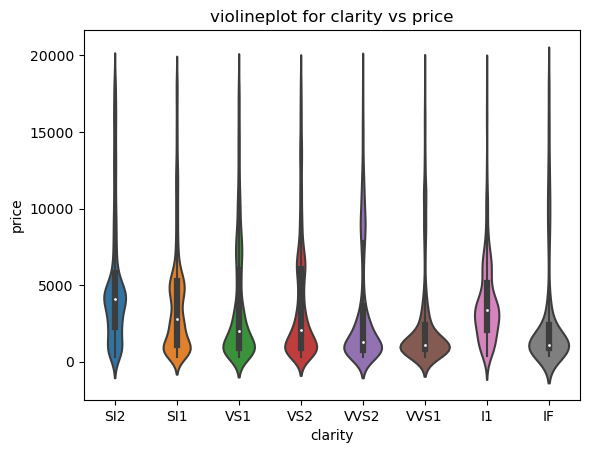

In [21]:
sns.violinplot(x='clarity',y='price',data=data)
plt.title("violineplot for clarity vs price")

## what is label encoding

Label encoding is a technique used in data preprocessing to transform categorical variables into numerical variables. In label encoding, each unique category of a categorical variable is assigned a numerical label, such as an integer, to represent it.

For example, consider a categorical variable "Color" with three possible values: "Red", "Green", and "Blue". In label encoding, "Red" might be assigned the label 0, "Green" might be assigned the label 1, and "Blue" might be assigned the label 2.

Label encoding is useful because many machine learning algorithms cannot handle categorical data directly. By encoding categorical variables as numerical labels, we can transform the data into a format that can be used by these algorithms.

However, there are some potential issues with label encoding. One issue is that the numerical labels may imply an order or magnitude among the categories, which may not be appropriate or meaningful for all types of categorical variables. Another issue is that the numerical labels may introduce bias or noise into the data if they are not assigned in a consistent or meaningful way.

Therefore, label encoding should be used with caution, and it is often better to use more advanced techniques such as one-hot encoding or target encoding to handle categorical variables, depending on the specific data and analysis.

## Explaining bit more about potential issues of label encoding

Sure, here are some potential issues with label encoding:

Implied order or magnitude: When using label encoding, each category of a categorical variable is assigned a numerical label, which implies an order or magnitude among the categories. However, this order or magnitude may not be meaningful or appropriate for all types of categorical variables. For example, consider a variable "Country" with categories such as "USA", "Canada", and "Mexico". Assigning numerical labels to these categories may imply an ordering, such as "USA" is greater than "Canada" which is greater than "Mexico", which is not necessarily true or meaningful.

Unequal intervals: The numerical labels assigned to categories in label encoding may not have equal intervals or distances between them. For example, consider a variable "Education" with categories such as "High School", "Bachelor's Degree", and "Master's Degree". Assigning numerical labels to these categories such as 1, 2, and 3 implies that the difference in level of education between "High School" and "Bachelor's Degree" is the same as the difference between "Bachelor's Degree" and "Master's Degree", which may not be true.

Bias or noise: The numerical labels assigned to categories in label encoding may introduce bias or noise into the data if they are not assigned in a consistent or meaningful way. For example, if the labels are assigned in an arbitrary or random order, this may lead to misleading or incorrect results in subsequent analyses or models.

Therefore, label encoding should be used with care, and it is important to consider the specific data and analysis before deciding to use label encoding or other techniques for handling categorical variables. Other techniques such as one-hot encoding or target encoding may be more appropriate in some cases, depending on the data and analysis.

In [22]:
# Lets encode the data to get ride of objective data types
label_data=data.copy() # make a copy to avoid the changing in original data
label_encoder=LabelEncoder() # here we are storing the label encoding function in label_encoder varaible
for col in object_cols:
    label_data[col]=label_encoder.fit_transform(label_data[col]) # The code assumes that object_cols is a list of column names in a pandas DataFrame label_data that contain categorical variables that need to be encoded numerically. For each column name col in object_cols, the code creates a new column in label_data with the same name as col, and assigns it the result of applying the fit_transform() method of a LabelEncoder object to the original column label_data[col]. The fit_transform() method of the LabelEncoder object first "fits" the encoder on the unique values of the column, essentially creating a mapping between each unique value and a numerical label. It then applies this mapping to the original column, replacing each unique value with its corresponding numerical label. The resulting numerical labels are assigned to the new column in label_data with the same name as col. After the code has run, each categorical variable column in label_data will have been replaced with a new column containing numerical labels.
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [23]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

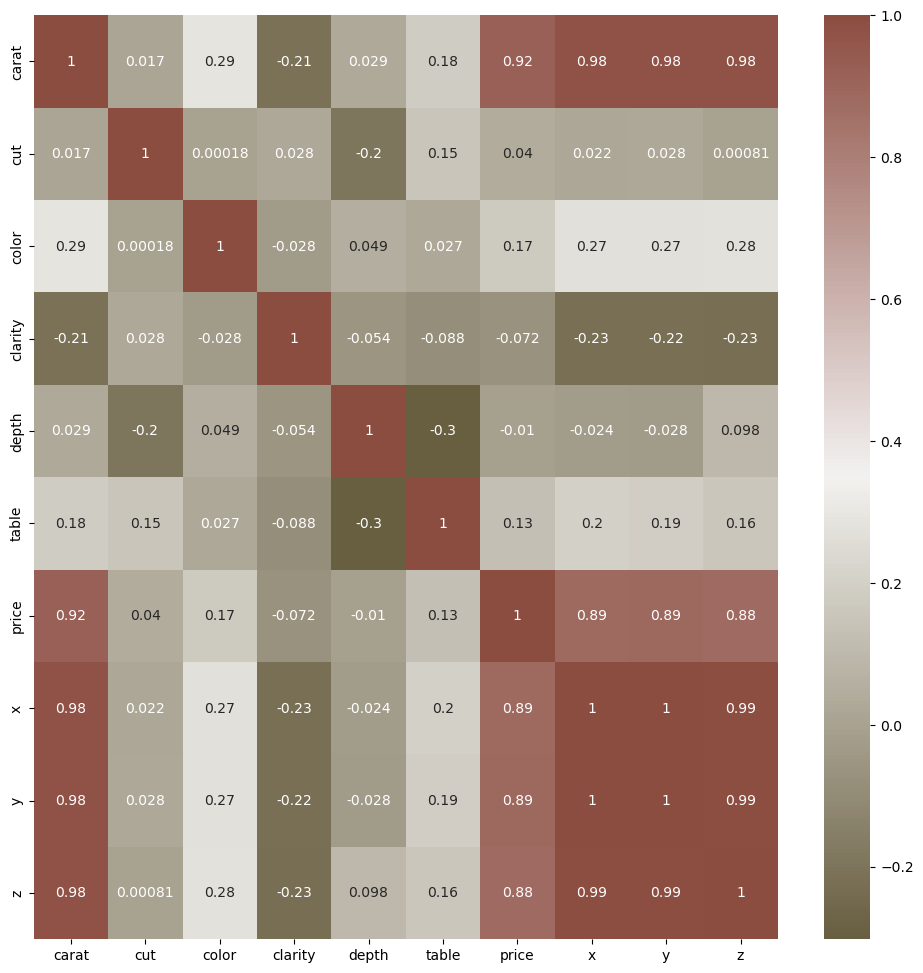

In [24]:
# correlation matrix
cmap=sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap=True) # This code generates a diverging color palette using the diverging_palette() function from the Seaborn library (sns). The color palette is designed to have a central point where the colors are neutral, and then diverge in two different directions to represent positive and negative values. This type of color scheme is often used in data visualization to represent values that have a natural midpoint and positive/negative extremes, such as temperature or sentiment. Here is an explanation of the arguments used in the diverging_palette() function: 70 and 20: These two values represent the hues of the two extreme colors in the palette. The first value (70) represents the hue of the positive extreme color, while the second value (20) represents the hue of the negative extreme color. In this case, the positive hue is a lighter yellow-green color, while the negative hue is a darker blue-green color. s=50 and l=40: These two values represent the saturation and lightness of the colors in the palette, respectively. In this case, the saturation is set to 50 and the lightness is set to 40, which means that the colors will be somewhat muted and not too bright. n=6: This value represents the number of colors to generate in the palette. In this case, n is set to 6, which means that the palette will contain 6 different colors. as_cmap=True: This argument specifies that the resulting color palette should be returned as a matplotlib colormap object (True), which can be used to map numerical values to colors in a plot. The resulting colormap object is assigned to the variable cmap, which can then be used to set the color scheme in a Seaborn plot.
corrmat=label_data.corr()
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,annot=True,cmap=cmap)

Points to notice:

1. "x", "y" and "z" show a high correlation to the target column.
2. "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.

## MODEL BUILDING
Steps involved in Model Building

2. Setting up features and target
3. Build a pipeline of standard scalar and model for five different regressors.
4. Fit all the models on training data
5. Get mean of cross-validation on the training set for all the models for negative root mean square error
6. Pick the model with the best cross-validation score
7. Fit the best model on the training set and get

### Build a pipeline of standard scalar 
1. A pipeline is a way of organizing a sequence of operations that need to be performed on some data. In machine learning, pipelines are commonly used to preprocess data before feeding it into a model for training or prediction. One common preprocessing step is feature scaling, which can be done using a standard scalar.


2. Standard scalar is a technique for scaling numerical features of a dataset to have zero mean and unit variance. This is done by subtracting the mean of each feature and dividing by its standard deviation. Standard scalar is a commonly used technique in machine learning because it can improve the performance of models that are sensitive to the scale of the input features.


3. To build a pipeline that uses standard scalar, you would typically first define a transformer object that performs the standard scalar transformation on a dataset. Then, you would combine this transformer with any other transformers that you want to apply to the data, such as feature selection or encoding categorical variables. Finally, you would fit the pipeline to your training data and use it to transform both your training and test data.

### Things to know about train_test_split 
1. x_train = it is data of input features/columns or independent features which the data is used to train the ml model
1. y_train = it is data of output features/columns or independent features or target feature which the data is used to train the 				ml model
1. x_test  = it is data of input features/columns or independent features which the data is used to test or predict the ml model
2. y_test =  it is data of output features/columns or independent features or target feature which data is hidden data for the                trained ml model 

if we say test size= 0.2 then it means 20% of data in both (x and y varibles which contain for x=i/p features ,y =o/p features),
In x variable which 20% of the data get separated as testing data which we can say as x_test (i/p features test data which is 20%)
In y variable which 20% of the data get separated as testing data which we can say as y_test (o/p feature test data which is 20%)

And remaining 80% of data get separated as training data in both x and y variables  as x_train, y_train

### VVVVV IMP

so 1st we train the ml model by using x_train,y_train data of both x & y variables
   2nd we predict the ml model (which is trained) by using x_test data which x varible which it contain i/p features test data
   3rd we evaluate the model performance by using evaluation metrics by just comparing the (predicted) x_test values with          (hidden data) which is y_test 
   
IN Conclusion the difference between (predicted) x_test values with (hidden data) which is y_test  is called an error 

In machine learning, error refers to the difference between the predicted output of a model and the true output or target value. The goal of a machine learning model is to minimize the error, which indicates how far off the model's predictions values which are (x_test) are from the actual values which are hidden values of y_test data .


In [25]:
x=label_data.drop(['price'],axis=1) # here i have taken all the i/p features into x variable  by just dropping the price feature which is an output variable ,axis =1 means it checks at columns for removing the price feature
y=label_data['price'] # here iam putting price feature which target varaible in y variable 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)# here iam performing train, test split and here test size =0.25 means iam given 25% of the data to the test data in both x,y varible

  ### Building pipelins of standard scaler and model for varios regressors.

In [26]:
# The code snippet you provided is creating several pipelines, each consisting of a standard scaler transformer and a different regression model. Specifically, the code creates the following pipelines: pipeline_lr: A pipeline that uses a standard scaler followed by a linear regression model. pipeline_dt: A pipeline that uses a standard scaler followed by a decision tree regression model. pipeline_rf: A pipeline that uses a standard scaler followed by a random forest regression model. pipeline_kn: A pipeline that uses a standard scaler followed by a k-nearest neighbors regression model. pipeline_xgb: A pipeline that uses a standard scaler followed by an XGBoost regression model. Each pipeline is created using the Pipeline class from the scikit-learn library in Python. The first argument to the Pipeline constructor is a list of tuples, where each tuple represents a step in the pipeline. The first element in the tuple is a string that gives a name to the step, and the second element is an instance of a transformer or estimator that performs the desired operation. In this case, the first step in each pipeline is a standard scaler transformer, which scales the input features to have zero mean and unit variance. The second step in each pipeline is a different regression model, which is trained on the scaled features to make predictions.
from sklearn.pipeline import Pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr_classifier',LinearRegression())]) # here i have taken the Pipeline fucntion in that iam trying to pass a tuple which it contain some lists as list1 ('scalar1',StandardScaler()),list2 ('lr_classifier',LinearRegression()) in the list 1 ('scalar1',StandardScaler()) the first list in each pipeline is a standard scaler transformer, which scales the input features to have zero mean and unit variance,in list2 ('lr_classifier',LinearRegression()) The second step in each pipeline is a different regression model, which is trained on the scaled features to make predictions.
pipeline_dt=Pipeline([('scalar2',StandardScaler()),('dt_classifier',DecisionTreeRegressor())])
pipeline_rf=Pipeline([('scalar3',StandardScaler()),('rf_classifier',RandomForestRegressor())])
pipeline_kn=Pipeline([('scalar4',StandardScaler()),('rf_classifier',KNeighborsRegressor())])
pipeline_xgb=Pipeline([('scalar5',StandardScaler()),('rf_classifier',XGBRegressor())])

In [27]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LinearRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('dt_classifier', DecisionTreeRegressor())]),
 Pipeline(steps=[('scalar3', StandardScaler()),
                 ('rf_classifier', RandomForestRegressor())]),
 Pipeline(steps=[('scalar4', StandardScaler()),
                 ('rf_classifier', KNeighborsRegressor())]),
 Pipeline(steps=[('scalar5', StandardScaler()),
                 ('rf_classifier',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                    

In [28]:
# Dictionary of pipelines and model types for ease of reference
pipe_dict={0:"LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}
pipe_dict

{0: 'LinearRegression',
 1: 'DecisionTree',
 2: 'RandomForest',
 3: 'KNeighbors',
 4: 'XGBRegressor'}

In [29]:
# Fit the Pipelines on the train data 
for pipe in pipelines: # here i have used for loop for training the pipeline of models which done by standard scaler as the i/p features get scale to zero mean unit varaince that gets done by subracting mean to i/p features and dividing it by standard deviation 
    pipe.fit(x_train,y_train) # here whichever the pipelines get store in pipelines varible it get iterate and each pipeline get store in pipe variable and then it got loop and that particular pipeline which get store in pipe get fit on train data and here fit( ) fucntion is used to train the scaled data which got possible by creating a pipeline by using standard_scaler

### After creating a pipeline on regressor models  i have trained all the pipeline on the train data by using fit fuction with for loop and then  now iam trying to perform the cross_validation for evaluating or getting to know which pipeline of model is performing well  

Note 
1. pipeline is used to increase the model performance which it would get done before feeding our train data to a model and after to predict on the test data 
2. cross validation is used to evaluate  the best model 
3. our 3rd step is that then after (finding the best model out of 5 regressor models which got created by using pipeline of standard scalar) by using cross_validation " now iam trying to predict the model by using test data" 

In [37]:
# The code i provided below performs k-fold cross-validation on a list of regression pipelines using the root mean squared error (RMSE) as the evaluation metric. Here's how the code works: cv_results_rms is an empty list that will be used to store the cross-validation scores for each pipeline. The code iterates over each pipeline in the pipelines list and performs 10-fold cross-validation using the cross_val_score function from scikit-learn. The cross-validation is performed on the training set (X_train, y_train) and the scoring parameter is set to "neg_root_mean_squared_error", which means that the negative root mean squared error will be used as the evaluation metric. The negative RMSE is used because scikit-learn's cross-validation functions expect scores to be maximized, whereas RMSE is a metric that needs to be minimized. By providing the negative RMSE, we are effectively asking scikit-learn to minimize this value. The cross-validation score for each pipeline is appended to the cv_results_rms list. The code prints the mean RMSE score for each pipeline using the pipe_dict dictionary to associate the pipeline with a name. Overall, the code is performing a common machine learning workflow, where we create a list of pipelines, perform k-fold cross-validation on each pipeline, and evaluate their performance using a specific evaluation metric. The code is using RMSE as the evaluation metric, but this metric could be changed to another metric as needed. The output of the code provides a measure of how well each pipeline performs on the training set, which can be used to select the best pipeline for making predictions on new data.
cv_results_rms=[]
for i,model in enumerate(pipelines):
    cv_score=cross_val_score(model,x_train,y_train,scoring="neg_root_mean_squared_error",cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i],cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -753.454538 
RandomForest: -547.197644 
KNeighbors: -823.656082 
XGBRegressor: -545.458108 


Testing the Model with the best score on the test set

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [39]:
# XGBOOST MODEL PREDICTION ON TEST DATA
pred=pipeline_xgb.predict(x_test)

## Explain the evalution metrics for model
Evaluation metrics are used to assess the performance of a model on a given task. The choice of evaluation metrics depends on the specific task and the goals of the model. Here are some commonly used evaluation metrics for different types of machine learning models:

A.Classification Models:

1. Accuracy: measures the proportion of correctly classified instances over the total number of instances.
2. Precision: measures the proportion of true positives (correctly classified positive instances) over the total number of                     predicted positives (both true positives and false positives).
3. Recall: measures the proportion of true positives over the total number of actual positives (both true positives and false              negatives).
4. F1 Score: the harmonic mean of precision and recall, which balances the two metrics.

B. Regression Models:

1. Mean Squared Error (MSE): measures the average squared difference between the predicted and actual values.
2. Root Mean Squared Error (RMSE): the square root of the MSE.
3. Mean Absolute Error (MAE): measures the average absolute difference between the predicted and actual values.
4. R-squared (R2): measures the proportion of variance in the dependent variable that is explained by the model.

C. Clustering Models:

1. Silhouette Coefficient: measures how well an instance is clustered with its own cluster compared to other clusters.
2. Calinski-Harabasz Index: measures the ratio of between-cluster variance to within-cluster variance, where higher values indicate better clustering.
3. Davies-Bouldin Index: measures the average similarity between each cluster and its most similar cluster, where lower values indicate better clustering.

Recommendation Models:

Precision: measures the proportion of recommended items that are relevant to the user.
Recall: measures the proportion of relevant items that are recommended to the user.
Mean Average Precision (MAP): measures the average precision of the recommended items at all positions in the ranked list.
It is important to choose the appropriate evaluation metric(s) for the specific task and to interpret the results in the context of the problem being solved.

### Regression models evaluation metrics types

Regression models are used to predict a continuous numerical output, such as the price of a house or the temperature of a city. The performance of a regression model is typically evaluated using one or more of the following evaluation metrics:

1. Mean Squared Error (MSE): This is the most commonly used evaluation metric for regression models. It measures the average squared difference between the predicted and actual values. The formula for MSE is:

                             MSE = (1/n) * ∑(y - ŷ)²

                             where n is the number of instances, y is the actual value, ŷ is the predicted value.

2. Root Mean Squared Error (RMSE): This is the square root of the MSE, which gives the error in the same units as the output                                        variable. The formula for RMSE is:

                                   RMSE = sqrt(MSE)

3. Mean Absolute Error (MAE): This measures the average absolute difference between the predicted and actual values. The formula                               for MAE is:

                              MAE = (1/n) * ∑|y - ŷ|

4. R-squared (R2): This measures the proportion of variance in the dependent variable that is explained by the model. R2 takes                      values between 0 and 1, where a value of 1 indicates a perfect fit. The formula for R2 is:

                   R2 = 1 - (SSres / SStot)

                  where SSres is the sum of squared residuals (the difference between the predicted and actual values) and SStot                   is the total sum of squares (the difference between the actual values and their mean).

It is important to choose the appropriate evaluation metric(s) for the specific regression task and to interpret the results in the context of the problem being solved. For example, if the goal is to minimize the prediction error, MSE and RMSE may be more appropriate, while MAE may be more appropriate if the goal is to minimize the absolute error. R2 can provide a measure of how well the model is performing overall, but it should be interpreted in conjunction with other evaluation metrics.

In [41]:
# Model Evalution = we need to use type of evalution metrics is for regression model which are R^2, Adjusted_R^2, MAE, MSE, RMSE
print("R^2:",metrics.r2_score(y_test,pred)) # here we used y_test a test of target feature and pred which is predicted x_test data of x varible which contain i/p features data
print("Adjusted R^2:",1-(1-metrics.r2_score(y_test,pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))



R^2: 0.9810847980166805
Adjusted R^2: 0.9810721569817172
MAE: 278.0934000996743
MSE: 296738.36462685897
RMSE: 544.7369682946614




### so based on the metrics values which i got for xgboost regressor model so how can i supposed to whether i got good values or not for evaluation metrics

The evaluation metrics you provided for your XGBoost regression model are:

1. R^2: 0.9810847980166805
2. Adjusted R^2: 0.9810721569817172
3. MAE: 278.0934000996743
4. MSE: 296738.36462685897
5. RMSE: 544.7369682946614

Based on these metrics, we can make the following interpretations:

1. R^2: This is a measure of how well the model fits the data. An R^2 value of 0.981 means that the model explains 98.1% of the variance in the target variable, which is a very good fit. This indicates that the model is able to capture most of the information in the data and can make accurate predictions.

2. Adjusted R^2: This is a modified version of R^2 that takes into account the number of predictors in the model. The adjusted R^2 value of 0.981 is very close to the R^2 value, which suggests that the model is not overfitting to the data and that the additional predictors in the model are not adding much explanatory power.

3. MAE: This is a measure of the average absolute difference between the predicted and actual values. The MAE value of 278.093 is relatively low, which indicates that the model's predictions are on average within 278.093 of the actual values. However, the interpretation of this metric depends on the scale of the target variable, so it's important to consider the context of the problem.

4. MSE: This is a measure of the average squared difference between the predicted and actual values. The MSE value of 296738.364 is relatively low, which indicates that the model's predictions are generally close to the actual values. However, like MAE, the interpretation of this metric depends on the scale of the target variable.

5. RMSE: This is the square root of the MSE, which gives the error in the same units as the target variable. The RMSE value of 544.737 is relatively low, which indicates that the model's predictions are generally close to the actual values and have low variance.

Overall, based on these metrics, we can say that the XGBoost regression model is performing well and making accurate predictions on the test data. However, it's important to consider other factors such as the complexity of the model, interpretability, and the context of the problem when evaluating the performance of a machine learning model.

## which ever the score that we are getting in evalution mertics of ml regression model
## after we evaluate our best generalized model from evalution metrics score
## is that mean the error is very less between x_test(predicted) and y_test ?

1. Yes, when you obtain the best evaluation metrics score for a regression model, it means that the model is performing well on the test data. If the evaluation metric(s) used are measures of error, such as mean squared error (MSE), root-mean-squared error (RMSE), or mean absolute error (MAE), then a lower value for these metrics indicates that the model is making predictions that are closer to the true values in the test set.

2. However, even if the evaluation metrics are good, it does not necessarily mean that the model is perfect or that it has zero error. There is always some degree of error in any machine learning model, and the goal is to minimize the error as much as possible while still maintaining good generalization performance on new data.

3. So, while getting the best evaluation metrics score is a good indication that the model is performing well, it is important to keep in mind that there may still be some error between the predicted values and the true values in the test set. It is also important to consider other factors, such as the interpretability of the model and its ability to handle new data and real-world scenarios.